In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
df = pd.read_csv('/content/feature_engineering_2.main.csv')

In [168]:
pd.set_option('display.max_columns',None)

In [169]:
df.shape

(3803, 23)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [171]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [172]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1954,flat,shree vardhman victoria,sector 70,1.80,9230.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,2.0,South-West,New Property,1950.0,NaN,1161.00,0,1,0,0,1,0,45
2952,house,independent,sector 104,0.80,80000.0,100.0,Plot area 100(9.29 sq.m.),13,6,3+,3.0,South,Moderately Old,NaN,100.0,NaN,1,1,0,1,1,0,0
378,flat,sare homes,sector 92,0.71,5354.0,1326.0,Carpet area: 1326 (123.19 sq.m.),3,3,3,2.0,North-West,Relatively New,NaN,NaN,1326.00,0,0,0,1,0,0,108
842,flat,mapsko mount ville,sector 79,1.30,8024.0,1620.0,Super Built up area 1620(150.5 sq.m.)Carpet ar...,3,3,2,6.0,West,Relatively New,1620.0,NaN,867.24,1,0,0,1,0,0,151
548,flat,eldeco accolade,sohna road,0.78,5422.0,1439.0,Super Built up area 1457(135.36 sq.m.),2,2,2,7.0,North,Relatively New,1457.0,NaN,NaN,1,0,0,0,0,1,137


In [173]:
df.duplicated().sum()

126

In [174]:
df.drop_duplicates(inplace=True)

In [175]:
df.duplicated().sum()

0

In [176]:
df.shape

(3677, 23)

In [177]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

Price

<ipython-input-178-f34a5975caef>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']);


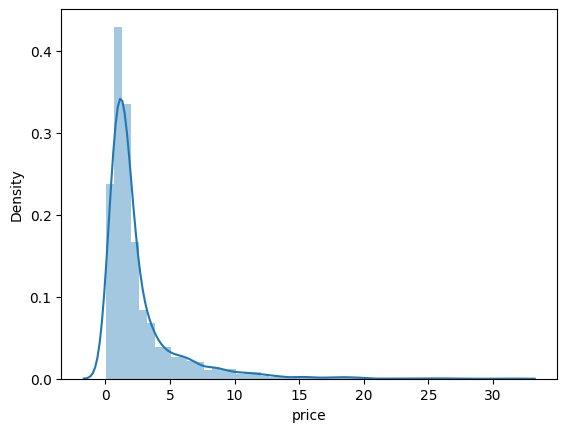

In [178]:
sns.distplot(df['price']);

<Axes: xlabel='price'>

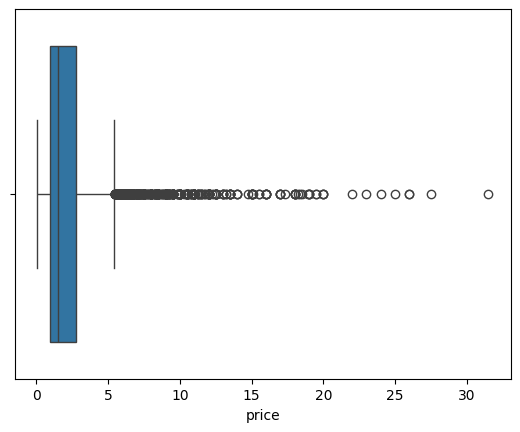

In [179]:
sns.boxplot(data=df,x=df['price'])

In [180]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

IQR = q3-q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR


print('lower bount {} , upper bound {}'.format(lower_bound,upper_bound))

lower bount -1.7500000000000002 , upper bound 5.45


In [181]:
price_outlier = df[(df['price']<lower_bound)| (df['price']>upper_bound)]

In [182]:
price_outlier.shape[0]

425

In [183]:
price_outlier['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

In [184]:
price_outlier.sort_values('price',ascending=False).head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
821,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.5,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
2834,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2488,house,dlf city plots,sector 26,26.0,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
2211,house,independent,sector 26,26.0,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
1686,house,suncity township,sector 54,25.0,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0


In [185]:
price_outlier.sort_values('price',ascending=False).tail(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1607,flat,raheja atlantis,sector 31,5.50,18688.0,2943.0,Super Built up area 2943(273.41 sq.m.),4,5,3+,1.0,North,Relatively New,2943.0,NaN,NaN,1,1,0,1,0,0,81
19,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.00,NaN,0,1,0,0,0,2,70
1222,house,independent,sector 23,5.50,13095.0,4200.0,Plot area 4200(390.19 sq.m.),9,9,3+,3.0,South,Moderately Old,NaN,4200.00,NaN,0,1,0,0,1,1,0
289,flat,experion windchants,sector 112,5.49,11584.0,4739.0,Super Built up area 4739(440.27 sq.m.)Built Up...,4,5,3+,5.0,South,Relatively New,4739.0,3655.35,NaN,0,1,0,0,0,1,168
1772,house,ansal api esencia,sector 67,5.46,24170.0,2259.0,Plot area 251(209.87 sq.m.),4,5,3+,2.0,East,Relatively New,NaN,2259.00,NaN,1,0,1,1,0,1,103


After the Observation we find out that there are some genuine property in our dataset that are outlier but they are reliable , to get more depth about price column we need to explore more on others columns , to make final decision.

Price Sqft

In [186]:
df['price_per_sqft']

0        7585.0
1        8600.0
2          79.0
3        5470.0
4        8020.0
         ...   
3798     6346.0
3799     9634.0
3800     8163.0
3801    28233.0
3802     9128.0
Name: price_per_sqft, Length: 3677, dtype: float64

In [187]:
df['price_per_sqft'].isnull().sum()

17

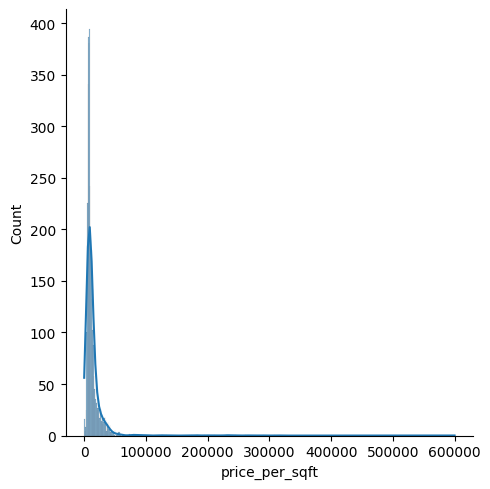

In [188]:
sns.displot(df['price_per_sqft'],kde=True)

(<Axes: xlabel='price_per_sqft'>,)

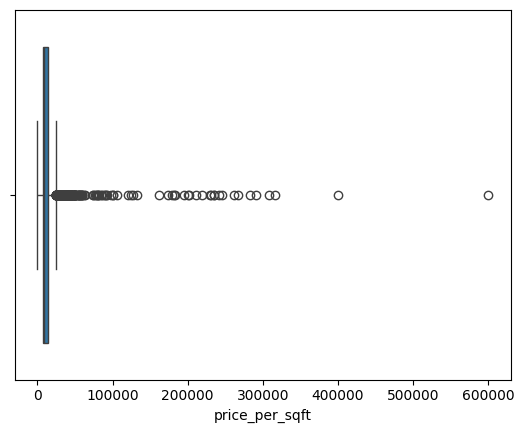

In [189]:
sns.boxplot(data=df,x=df['price_per_sqft']),

In [190]:
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

print('lower bound {} , upper bound {}'.format(lower_bound,upper_bound))

lower bound -3777.625 , upper bound 24475.375


In [191]:
price_sqft_outlier = df[(df['price_per_sqft']<lower_bound) | (df['price_per_sqft']>upper_bound)]

In [192]:
price_sqft_outlier.shape[0]

354

In [193]:
price_sqft_outlier['price_per_sqft'].describe()

count       354.000000
mean      52592.612994
std       61150.458507
min       24489.000000
25%       28208.250000
50%       33368.500000
75%       41982.250000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [194]:
price_sqft_outlier['area'] = price_sqft_outlier['area'].apply(lambda x: x*9 if x<1000 else x)

<ipython-input-194-724b4acf90f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_sqft_outlier['area'] = price_sqft_outlier['area'].apply(lambda x: x*9 if x<1000 else x)


In [195]:
price_sqft_outlier['price_per_sqft'] = round((price_sqft_outlier['price']*10000000)/(price_sqft_outlier['area']))

<ipython-input-195-02eb2600cb6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_sqft_outlier['price_per_sqft'] = round((price_sqft_outlier['price']*10000000)/(price_sqft_outlier['area']))


In [196]:
price_sqft_outlier['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [197]:
df.update(price_sqft_outlier)

<ipython-input-198-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

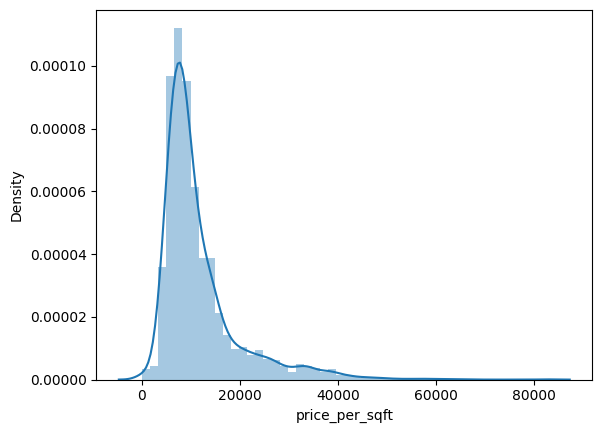

In [198]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

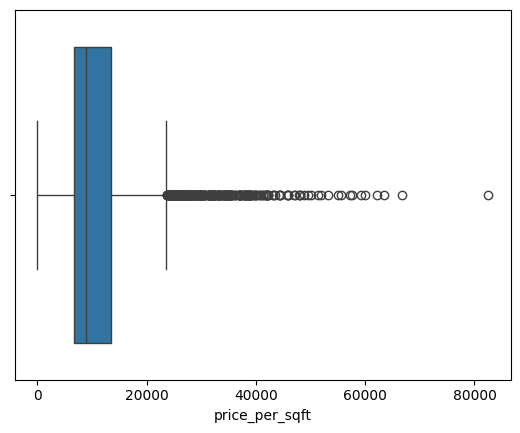

In [199]:
sns.boxplot(x=df['price_per_sqft'])

In [200]:
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

print('lower bound {} , upper bound {}'.format(lower_bound,upper_bound))

lower bound -3394.125 , upper bound 23624.875


In [201]:
price_sqft_outlier_2 = df[(df['price_per_sqft']<lower_bound) | (df['price_per_sqft']>upper_bound)]

In [202]:
price_sqft_outlier_2.shape[0]

317

In [203]:
price_sqft_outlier_2[price_sqft_outlier_2['price_per_sqft']>50000].shape[0]

13

There are only 13 values in our data where price_per_sqft is more than 50000 and these value fall into category of outlier so we can simply remove them as they are less in number

In [204]:
df = df[df['price_per_sqft']<=50000]

<Axes: xlabel='price_per_sqft'>

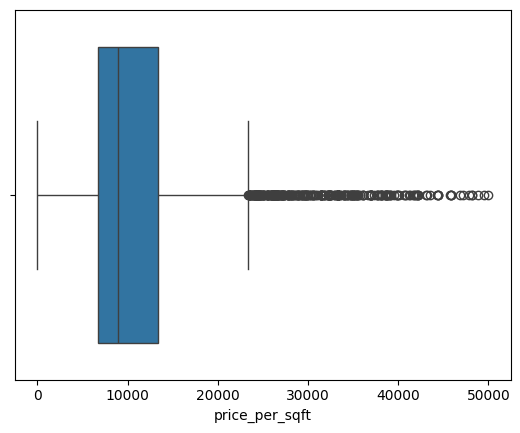

In [206]:
sns.boxplot(x=df['price_per_sqft'])

<ipython-input-207-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

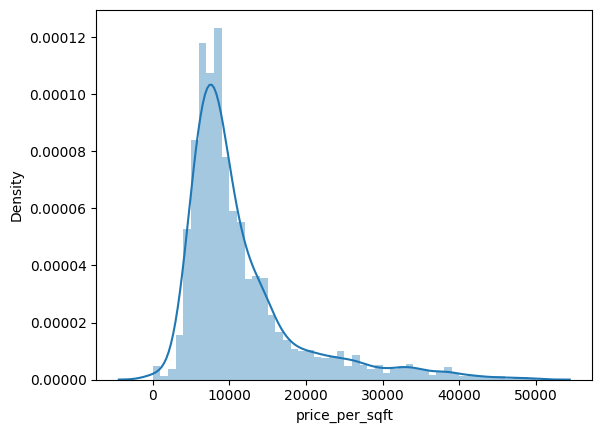

In [207]:
sns.distplot(df['price_per_sqft'])

In [208]:
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

print('lower bound {} , upper bound {}'.format(lower_bound,upper_bound))

lower bound -3237.0 , upper bound 23355.0


In [209]:
price_sqft_outlier_2 = df[(df['price_per_sqft']<lower_bound) | (df['price_per_sqft']>upper_bound)]

In [211]:
price_sqft_outlier_2['price_per_sqft'].shape[0]

312

Area

<ipython-input-212-5d76ceae9310>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['area'])


<Axes: ylabel='Density'>

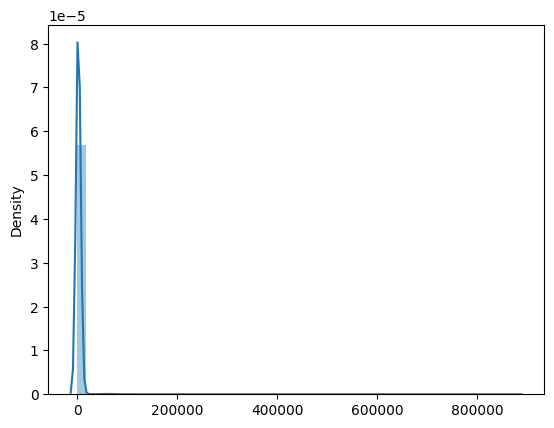

In [212]:
sns.distplot(x=df['area'])

<Axes: xlabel='area'>

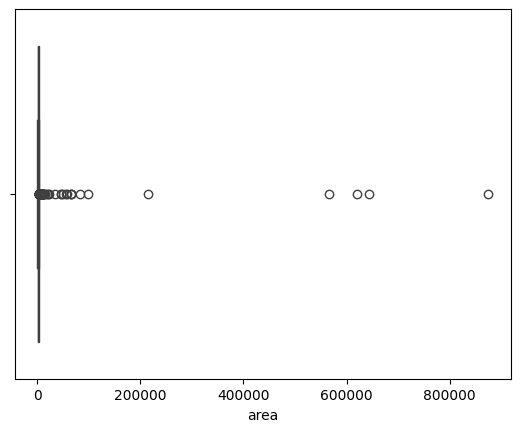

In [213]:
sns.boxplot(x=df['area'])

In [214]:
q1 = df['area'].quantile(0.25)
q3 = df['area'].quantile(0.75)

IQR = q3-q1

lower_bound  = q1 - 1.5*IQR
upper_bound  = q3 + 1.5*IQR

print('lower bound {} , upper bound  {}'.format(lower_bound,upper_bound))

lower bound -370.0 , upper bound  3982.0


In [215]:
area_outlier = df[(df['area']<lower_bound) | (df['area']>upper_bound)]

In [216]:
area_outlier.shape[0]

234

In [217]:
area_outlier.sort_values('area',ascending=False).head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1648,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
2111,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
2651,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
1638,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
3021,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0


In [218]:
area_outlier['area'].describe()

count       234.000000
mean      20771.106838
std       89884.023086
min        4000.000000
25%        4518.000000
50%        5022.000000
75%        6869.500000
max      875000.000000
Name: area, dtype: float64

In [219]:
df = df[df['area'] < 100000]

<ipython-input-220-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

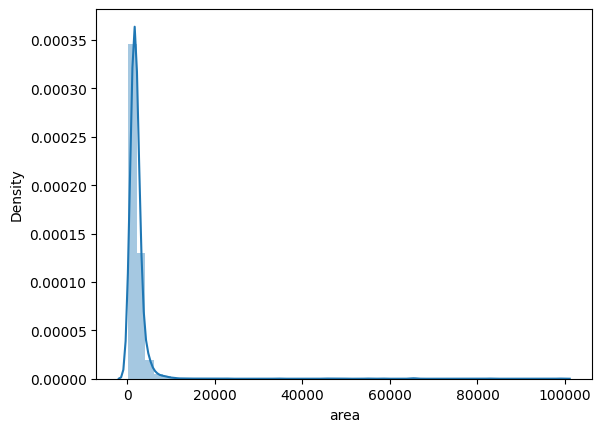

In [220]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

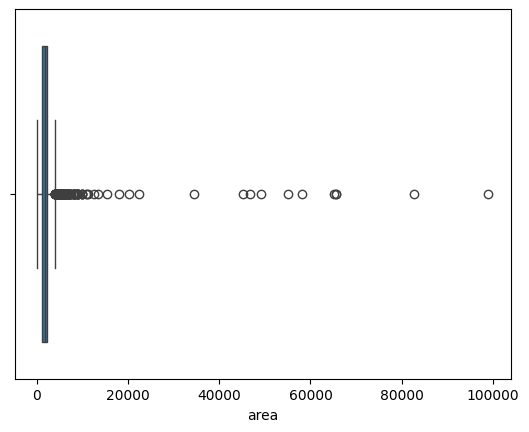

In [221]:
sns.boxplot(x=df['area'])

In [222]:
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [223]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
1358,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,1,61
3195,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,1,123
2131,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,1,0,0,1,1,1,44
3088,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,0,160
3444,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
2834,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2342,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,0,60


In [224]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

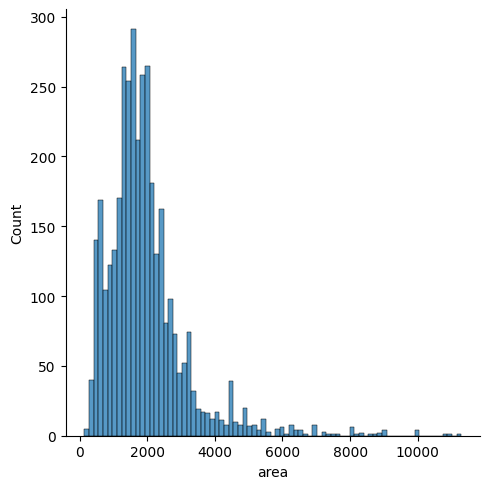

In [225]:
sns.displot(df['area'])

<Axes: xlabel='area'>

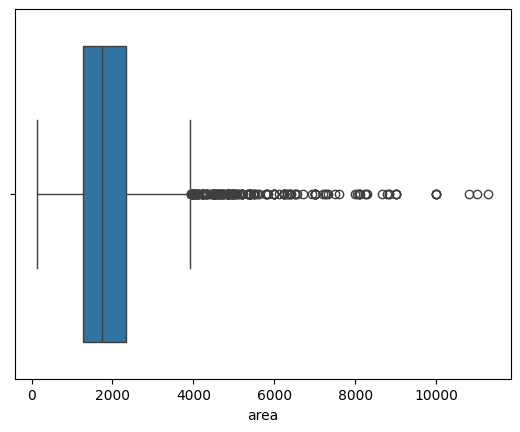

In [226]:
sns.boxplot(x=df['area'])

In [227]:
df['area'].describe()

count     3633.000000
mean      1950.357005
std       1215.707897
min        145.000000
25%       1260.000000
50%       1747.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

Bedroom

<ipython-input-230-926418d7e639>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

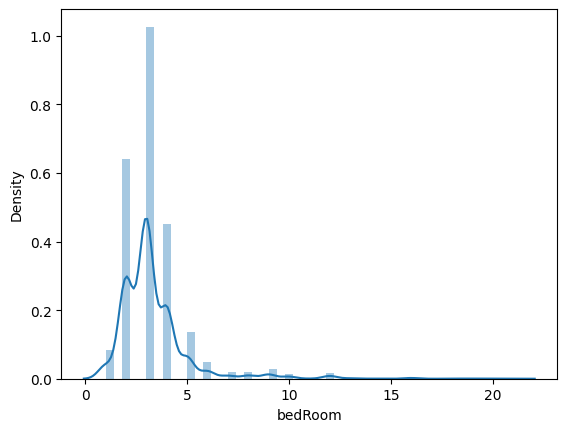

In [230]:
sns.distplot(df['bedRoom'])

In [229]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

<Axes: xlabel='bedRoom'>

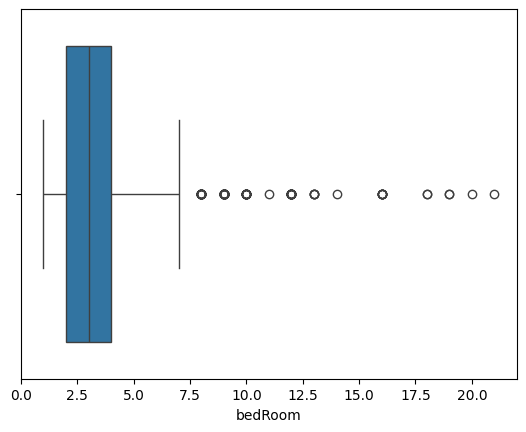

In [232]:
sns.boxplot(x=df['bedRoom'])

In [233]:
df[df['bedRoom']>10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
19,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
66,house,independent,sector 13,0.50,10101.0,495.0,Plot area 55(5.11 sq.m.),12,4,3,4.0,NaN,Old Property,NaN,55.0,NaN,0,0,0,0,0,0,15
78,house,independent,sector 17,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
119,house,independent,sector 55,7.49,27741.0,2700.0,Plot area 300(250.84 sq.m.),12,12,3+,4.0,South-East,Relatively New,NaN,2700.0,NaN,1,1,0,1,0,1,49
127,house,independent,sector 57,6.95,38611.0,1800.0,Plot area 192(160.54 sq.m.),12,12,3+,4.0,East,New Property,NaN,1728.0,NaN,0,1,1,0,0,1,73
354,house,independent,sector 46,6.50,27461.0,2367.0,Plot area 263(219.9 sq.m.),12,12,3+,4.0,North-West,Relatively New,NaN,2367.0,NaN,1,0,0,1,0,1,32
372,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16,16,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,1,20
614,house,independent,sector 26,8.49,47167.0,1800.0,Plot area 200(167.23 sq.m.),12,12,3+,4.0,North,Relatively New,NaN,1800.0,NaN,0,1,0,1,0,1,42
690,house,independent,sector 28,11.00,33951.0,3240.0,Plot area 360(301.01 sq.m.),13,13,3+,3.0,East,Relatively New,NaN,3240.0,NaN,1,1,0,1,0,2,122
874,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153


In [234]:
df = df[df['bedRoom']<=10]

<ipython-input-235-926418d7e639>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

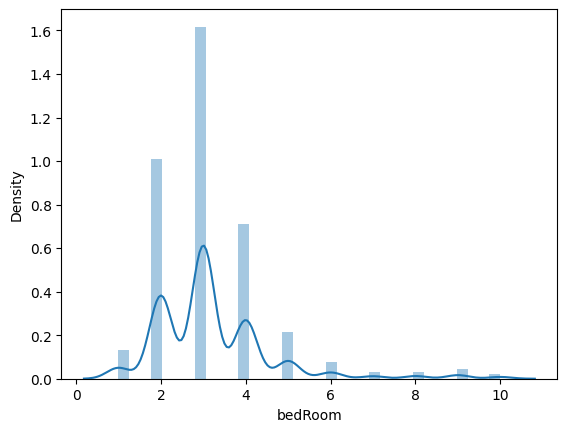

In [235]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

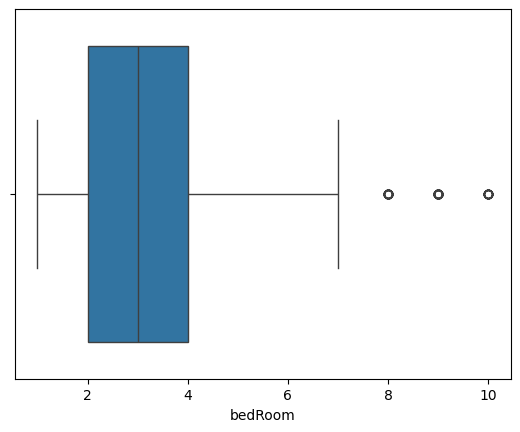

In [236]:
sns.boxplot(x=df['bedRoom'])

Bathroom

<ipython-input-237-6f8990f100b4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

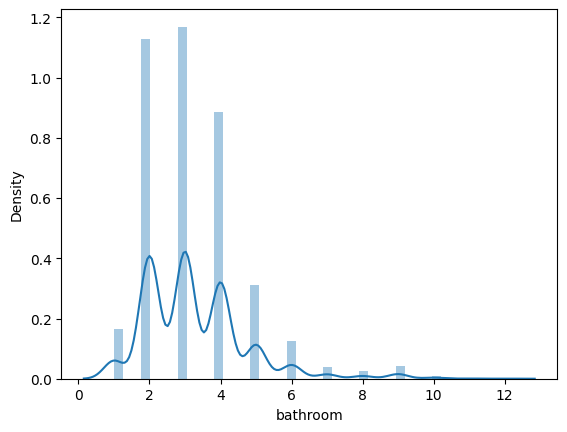

In [237]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

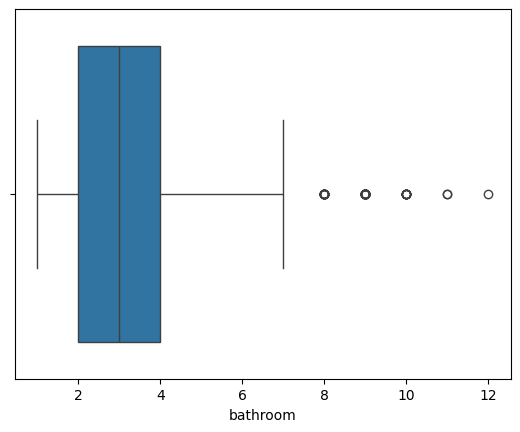

In [238]:
sns.boxplot(x=df['bathroom'])

There are not genuine outlier in this columns

In [239]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

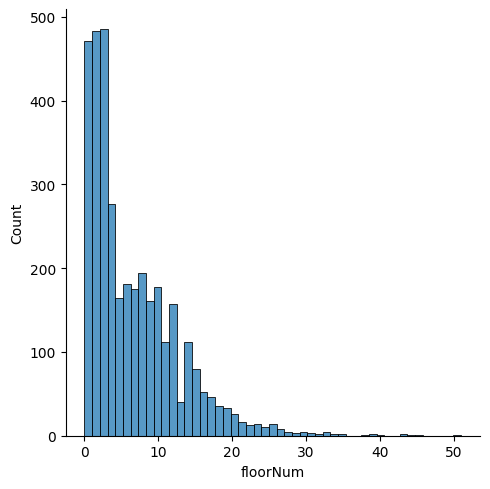

In [240]:
sns.displot(df['floorNum'])

<Axes: xlabel='floorNum'>

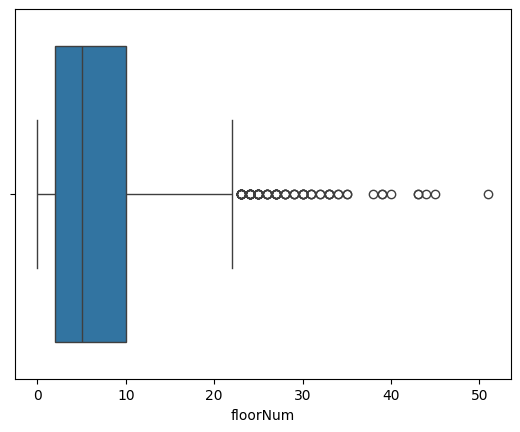

In [241]:
sns.boxplot(x=df['floorNum'])

In [243]:
df.sort_values('floorNum',ascending=False).head(10)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2147,house,ireo victory valley,sector 67,8.00,22222.0,3600.0,Plot area 400(334.45 sq.m.),6,7,3+,51.0,North-East,Moderately Old,NaN,3600.0,NaN,1,1,0,1,0,1,49
33,flat,m3m heights,sector 65,2.86,14000.0,2043.0,Carpet area: 2040 (189.52 sq.m.),3,3,3,45.0,East,Under Construction,NaN,NaN,2040.0,0,1,0,0,0,0,48
360,flat,m3m heights,sector 65,2.78,15200.0,1829.0,Super Built up area 1828(169.83 sq.m.),3,3,3,44.0,NaN,Undefined,1828.0,NaN,NaN,0,0,0,0,0,0,56
2648,flat,m3m skycity,sector 65,2.10,16030.0,1310.0,Super Built up area 1310(121.7 sq.m.),2,2,2,43.0,NaN,New Property,1310.0,NaN,NaN,0,0,0,0,0,0,127
2018,flat,m3m skycity,sector 65,2.85,15590.0,1828.0,Super Built up area 1828(169.83 sq.m.),3,3,3,43.0,South,Under Construction,1828.0,NaN,NaN,0,0,0,0,0,1,115
3480,flat,m3m heights,sector 65,1.90,13991.0,1358.0,Built Up area: 1358 (126.16 sq.m.),2,2,2,40.0,NaN,Undefined,NaN,1358.0,NaN,0,0,0,0,0,0,48
785,flat,tata primanti,sector 72,4.10,14100.0,2908.0,Super Built up area 2905(269.88 sq.m.),4,5,3+,39.0,NaN,New Property,2905.0,NaN,NaN,0,1,0,0,1,0,103
1579,flat,tata primanti,sector 72,3.90,13425.0,2905.0,Super Built up area 2905(269.88 sq.m.)Carpet a...,4,4,3+,39.0,East,Relatively New,2905.0,NaN,2150.0,0,1,0,0,1,0,49
3068,flat,m3m golfestate,sector 65,5.30,24211.0,2189.0,Super Built up area 2850(264.77 sq.m.)Carpet a...,3,3,3,38.0,North-East,Moderately Old,2850.0,NaN,2189.0,0,1,0,0,0,2,49
877,flat,ireo victory valley,sector 67,3.05,16266.0,1875.0,Super Built up area 2385(221.57 sq.m.)Built Up...,3,4,2,35.0,South-West,Relatively New,2385.0,2200.0,1875.0,1,1,0,0,0,1,165


Super Built up Are

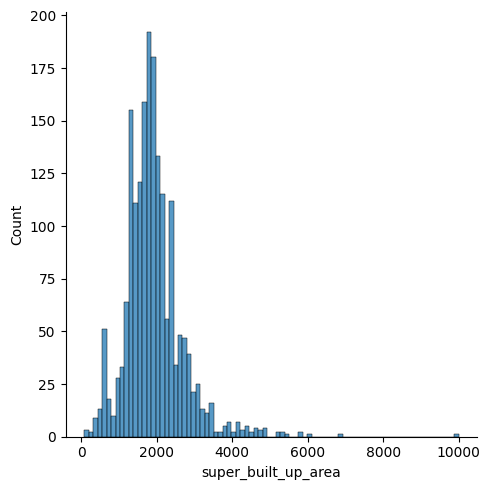

In [244]:
sns.displot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

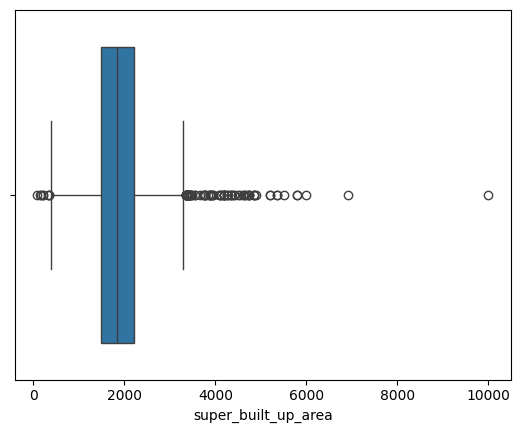

In [245]:
sns.boxplot(x=df['super_built_up_area'])

In [246]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

Built up area and Super Built up area outliers are genuine and less .

**Carpet Area**

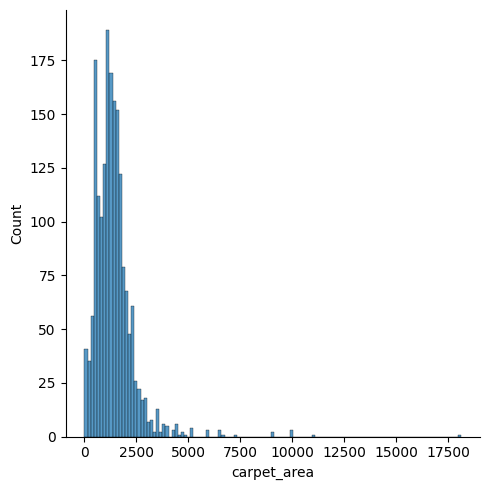

In [247]:
sns.displot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

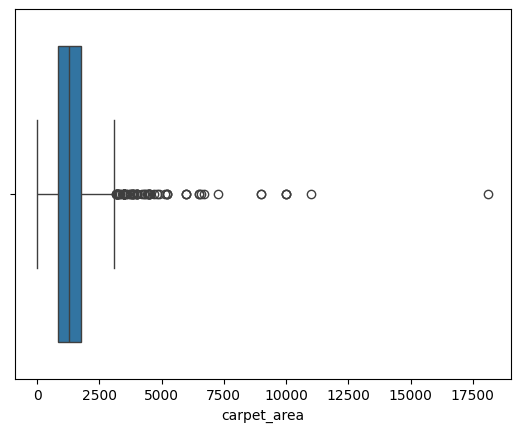

In [248]:
sns.boxplot(x=df['carpet_area'])

In [249]:
df[df['carpet_area']>10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2131,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [250]:
df.loc[2131,'carpet_area'] = 1812

In [251]:
df[df['carpet_area']>10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


<ipython-input-252-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

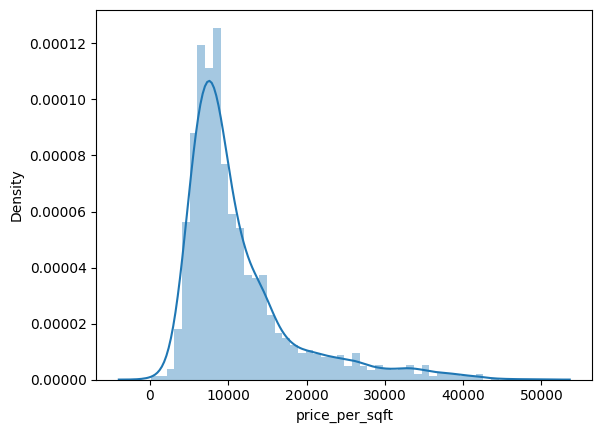

In [252]:
sns.distplot(df['price_per_sqft'])

In [253]:
df.shape

(3588, 23)

In [ ]:
df.to_csv('',index=False)